# File Input Output
Persistent Data Storage

Types of Files: text file, binary file

    Text File: stores data as a stream of characters, each line ends with a new line character. typical extension of  
               plain text file is .txt
        CSV File: A type of text file that stores tabular data. 
                  Each line is one observation of multiple values separated by comma.
                  CSV stands for comma separated values. extension: .csv
    Binary File: Can store characters, numeric data as well as objects of all types. 
                 Typical extensions:.bin,.dat
    
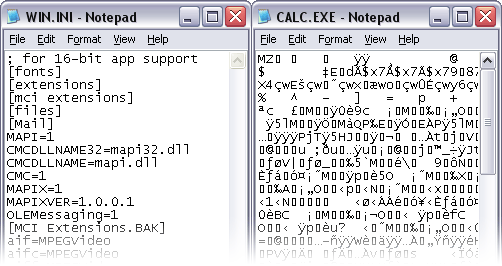

<center>Figure:On the left is a text file opened in notepad while on the right is a binary file opened in notepad</center>
        

## Sequence of file operations:
    1. Open the file: open(file,mode) 
                      Arguments
                         file: filepath (relative: from working directory or absolute)
                         mode: described in table below. 
                      Returns
                         file object
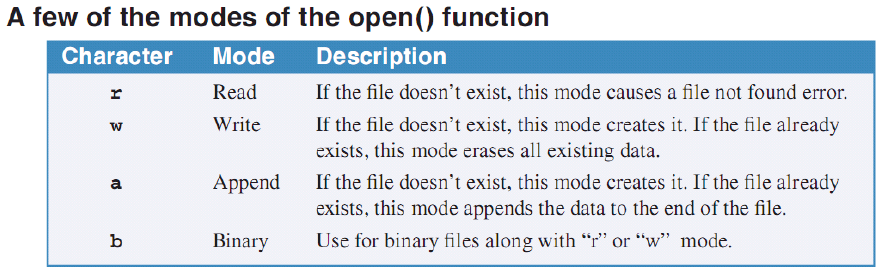

    2. Write data (from main memory/RAM) to file or read from file
    3. Close the file : fileobj.close() frees up the resources

In [ ]:
outfile=open("util_files/test.txt","w")
outfile.write("test data\ntest2\ntest3")
outfile.close()

In [ ]:
infile=open("util_files/test.txt")#default mode is "r"
print(infile.readline())
infile.close()

## Closing a file, exceptions, with statement
When a File is closed, the memory taken up by it is released

In [ ]:
infile=open("util_files/test.txt")#default mode is "r"
print(infile.fileno())
infile.close()
print(infile.fileno())

However if an exception occurs after file is opened and before it is closed, the object keeps on taking up the memory

In [ ]:
infile=open("util_files/test.txt")#default mode is "r"
print(infile.readline())
x=10/0
infile.close()

In [ ]:
print(infile.fileno())

Solution: <b>with </b> statement

In [ ]:
with open("util_files/test.txt") as infile:
    print(infile.fileno())
    

print(infile.fileno())

In [ ]:
with open("util_files/test.txt") as infile:
    print(infile.fileno())
    7/0
    

In [ ]:
print(infile.fileno()) #Resource freed despite exception

## Four methods to read data: 
    1. loop through each line of file
    or use following methods of file object:
        2. read(): reads entire file into a string
        3. readline(): reads next line as a string
        4. readlines(): reads all the lines and returns them as a list
Word of caution: use readline or loop so that if the file is too large, you don't run out of memory reading it all at once.

In [ ]:
with open("util_files/test.txt") as infile:
    x=infile.read()
    print(type(x))
    print(x)

In [ ]:
with open("util_files/test.txt") as infile:
    x=infile.readlines()
    print(type(x))
    print(x)
    print(x[0])    

In [ ]:
with open("util_files/test.txt") as infile:
    x=infile.readline()
    print(type(x))
    print(x)
    x=infile.readline()
    print(type(x))
    print(x)

In [ ]:
with open("util_files/test.txt") as infile:
    for line in infile:
        print(type(line))
        print(line)

## Special example: read and write to file via lists

#### 1. Always convert non-string data to string before writing to text file

In [ ]:
years=[1995, 2000, 2019]
with open("util_files/years.txt","w") as outfile:
    for year in years:
        outfile.write(year)

In [ ]:
years=[1995, 2000, 2019]
with open("util_files/years.txt","w") as outfile:
    for year in years:
        outfile.write(str(year)+"\n")

#### 2. Convert string read from file to whichever datatype is expected, eg: int

In [ ]:
years=[]
with open("util_files/years.txt","r") as infile:
    for line in infile:
        years.append(int(line))
print(years)

#### 3. If reading data as list of strings, take care of \n character

In [ ]:
#\n may pose a problem:
lines=[]
with open("util_files/test.txt","r") as infile:
    for line in infile:
        lines.append(line)
print(lines)

In [ ]:
#Solution:
lines=[]
with open("util_files/test.txt","r") as infile:
    for line in infile:
        line=line.replace("\n","")
        lines.append(line)
print(lines)

## CSV Files
Each line is a record of multiple columns (fields) separated by comma

In [ ]:
import csv 
fields = [] 
rows = [] 
with open("util_files/mycsv.csv", 'r') as csvfile: 
    csvreader = csv.reader(csvfile) 
#     fields = csvreader.next() 
    for row in csvreader: 
        rows.append(row) 
    print("Total no. of rows: %d"%(csvreader.line_num)) 
print('Field names are:' + ', '.join(field for field in fields)) 
  
print('\nThe rows are:\n') 
for row in rows[:5]: 
    for col in row: 
        print("%10s"%col), 
    print('\n')

In [ ]:
import csv
days=[["Mon,",1],["Tue",2],["Wed",3],["Thu",4],["Fri",5],["Sat",6],["Sun",0]]
with open("days.csv","w",newline="") as file: # setting newline argument to "" 
                                            #enables universal newline mode so r/w works correctly on all OS
    writer=csv.writer(file) #CSV writer object converts data to comma separated values
    writer.writerows(days)  #writes the rows to file

In [ ]:
days=[]
with open("days.csv",newline="") as file:
    reader=csv.reader(file)
    for day,id in reader:
        days.append([day,int(id)])
days

In [ ]:
# Or
# for row in reader:
#   days.append([row[0],int(row[1])])

<br> If the data itself contains commas, newline CSV module automatically handles this by adding quotes around these special characters before writing to file
If the data contains quotes, or tab is used to separate fields in csv file we want to read from, we can specify optional arguments while reading/writing
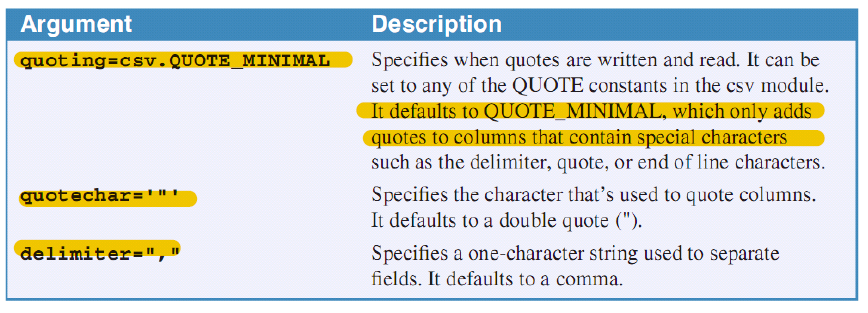